### Example Usage

Possible insufficient data for correction. Zero count: 1493


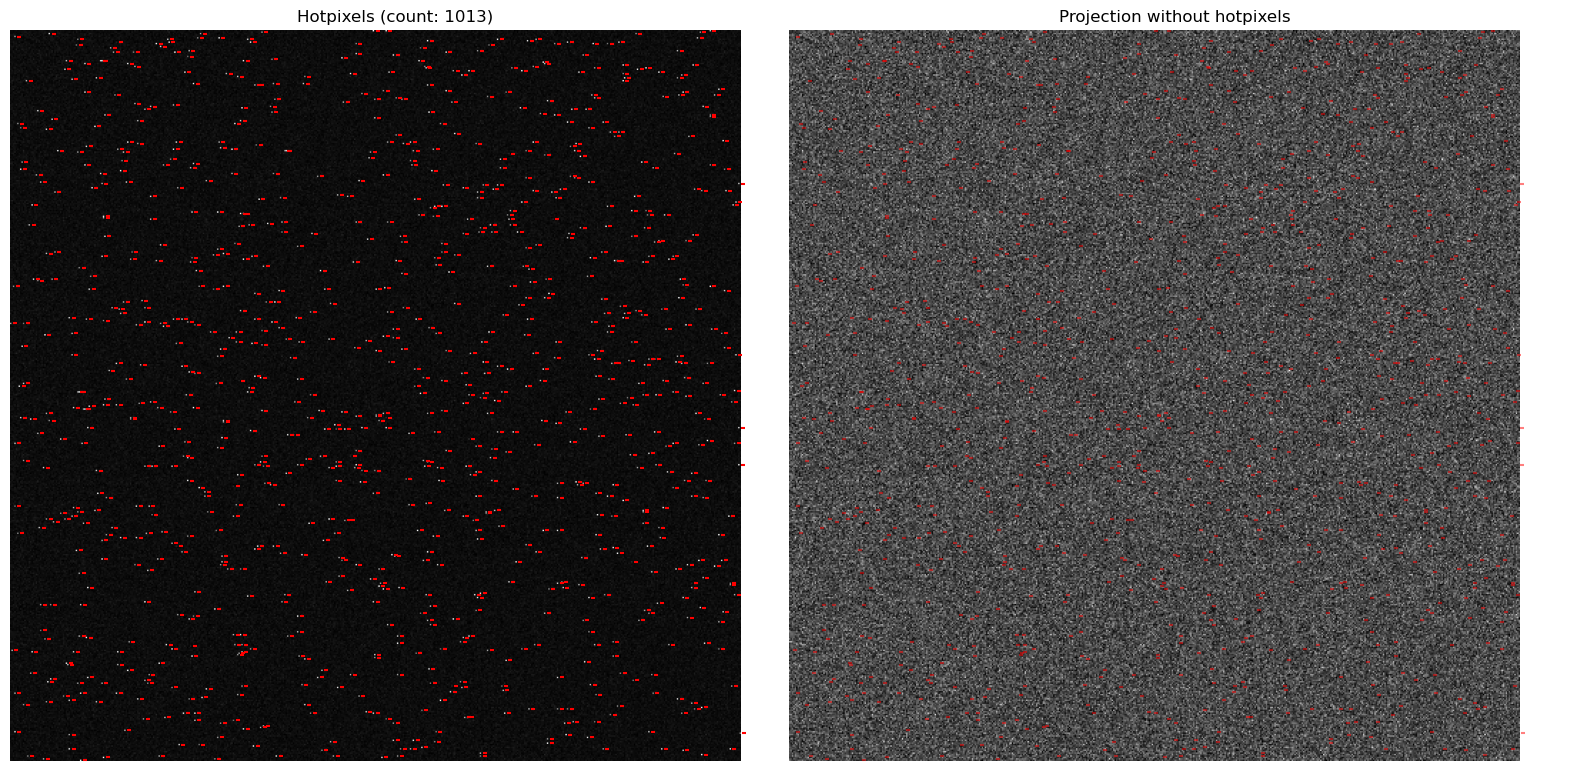

In [1]:
# Imports
import sys

sys.path.append("../src/")
sys.path.append("../src/spadtools/")
from spadtools.spadio import SPADFile, SPADData
import spadtools.spadclean as sc
from copy import deepcopy
from typing import cast


test_image = sc.GenerateTestData()
hotpixel = sc.SPADHotpixelTool(test_image.generate())
hotpixel.inspect(threshold=1.5)
# This will retun an warning as the number of frame is small

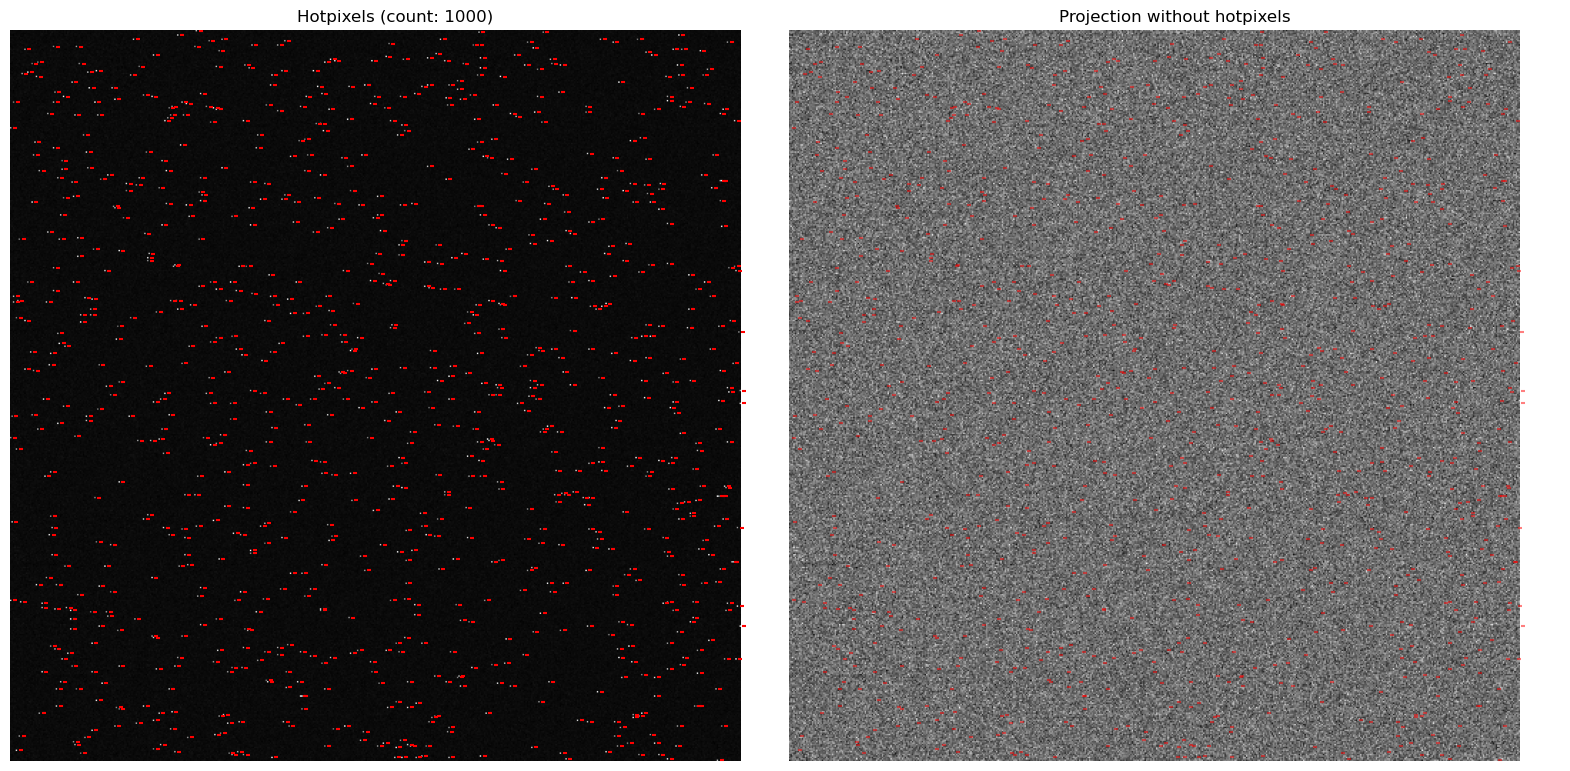

In [2]:
test_image.z_size = 400
hotpixel = sc.SPADHotpixelTool(test_image.generate())
hotpixel.inspect(threshold=1.5)  # no more errors

### Test dummy data

In [3]:
test_data_path = test_image.create()
test_dataset = SPADFile(test_data_path, load_data=True)

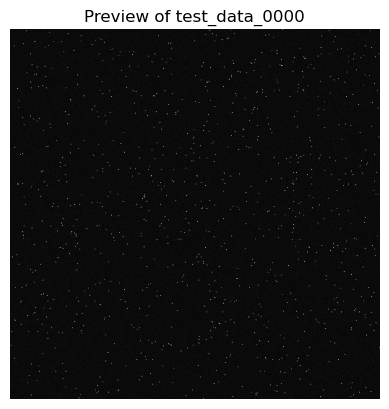

array([[17, 19, 28, ..., 17, 20, 19],
       [13, 21, 16, ..., 15, 33, 15],
       [22, 23, 28, ..., 23, 19, 15],
       ...,
       [20, 22, 16, ..., 25, 12, 18],
       [19, 22, 26, ..., 27, 15, 17],
       [20, 17, 21, ..., 20, 18, 12]], dtype=uint64)

In [4]:
test_dataset[0].preview(plot=True)

In [5]:
test_image.remove()  # Clean up the dummy data

In [6]:
# Concatenate the first 10 frames
data = cast(SPADData, deepcopy(test_dataset[0]))
for f in test_dataset[1:10]:
    data += cast(SPADData, f)
print(test_dataset[0].data.shape)
print(data.data.shape)

(400, 512, 512)
(4000, 512, 512)
